# Part 3: Exploratory Data Analysis

It's important to get an overvall view of our data before plugging it into a machine learning algorithm. The process of exploring our dataset is called Exploratory Data Analysis (EDA). During this process, we can get a better sense of the size of our dataset, the features (columns) that we're working with, and identify potential outliers.

In this tutorial, we're going to be performing EDA on Airbnb's New York City [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) which contains Airbnb listing activity and metrics in NYC.

### Importing Dependencies

We'll be using the following packages:

- [pandas](https://pandas.pydata.org/) - good for data manipulation and analysis
- [numpy](https://numpy.org/) - good for scientific computing 
- [matplotlib](https://matplotlib.org/) - plotting package
- [seaborn](https://seaborn.pydata.org/) - plotting package (an extension of matplotlib)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Loading the Data

Our dataset is a csv file called `airbnb_nyc.csv` stored in the `data/` folder. Let's load it in as a Pandas DataFrame. 

In [10]:
data = pd.read_csv("data/airbnb_nyc.csv")

### How many rows and columns are in our dataset? 

We can get the number of rows and columns from our dataframe using `.shape`. This will return a tuple of (`n_rows`, `n_cols`).

In [13]:
data.shape

(48895, 16)

### What are the columns that we're dealing with in this dataset?

In [15]:
for c in data.columns:
    print(f"- {c}")

- id
- name
- host_id
- host_name
- neighbourhood_group
- neighbourhood
- latitude
- longitude
- room_type
- price
- minimum_nights
- number_of_reviews
- last_review
- reviews_per_month
- calculated_host_listings_count
- availability_365


### A Glimpse of the Dataset

What are the first 5 columns of the dataset? This will give us a good ideea of the columns and datatypes we'll be working with.

In [12]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We have 2 ID's - one for the listing (`id`) and the other for the host (`host_id`). Are there hosts that have multiple listings?

In [18]:
print(f"Number of listings: {data['id'].nunique()}")
print(f"Number of hosts: {data['host_id'].nunique()}")

Number of listings: 48895
Number of hosts: 37457


There are 1000 more listings than hosts. This means that some hosts do have multiple listings. We can check this out using the [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method, which will show us how many times a given `host_id` shows up in our dataset.

In [22]:
host_counts = data['host_id'].value_counts()

host_counts[0:10]

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Looking at the first 10 host ID's, we can see that the most active host is `219517861` with 327 listings, followed by `107434423` who has 232 listings. 

### Which neighbourhood group (New York borough) has the most Airbnb listings?

There are two ways of figuring out the listing counts in each borough. We can either use `value_counts` as we did previously, or we can use the [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method. With `groupby`, we can group our dataframe by `neighbourhood_group` then count the number of `id`'s in each borough. Let's try it out below.

In [45]:
borough_counts = data.groupby('neighbourhood_group')['id'].count()
borough_counts

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

Manhattan has the most Airbnb listings (21,661), while Staten Island has the least (373). 

A nice way to visualize this is using Seaborn's countplot. 

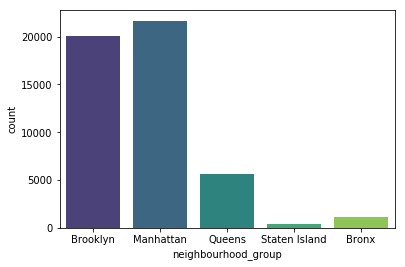

In [86]:
sns.countplot(data['neighbourhood_group'], palette='viridis')

### How many neighborhoods are there?

Neighbourhood is a more granular description of neighborhood group. Let's see how many neighbourhoods we're dealing with. 

In [29]:
print(f"There are {data['neighbourhood'].nunique()} neighborhoods in our dataset")

There are 221 neighborhoods in our dataset


How many neighborhoods exist in each borough? We can use `groupby` to figure this out.

In [31]:
data.groupby('neighbourhood_group')['neighbourhood'].nunique()

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

There are 51 neighborhoods in Queens, while only 32 in Manhattan.

### Which neighbourhood has the most listings?

In [59]:
neighbourhood_counts = data['neighbourhood'].value_counts()
neighbourhood_counts[0:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

The output of `value_counts()` is a Pandas series which contains counts of each borough. The borough name is represnted as the index. We can convert the output above into a dataframe by applying `reset_index()`. This will make the index into a separate column, which we want.  

In [60]:
neighbourhood_counts = neighbourhood_counts.reset_index()
neighbourhood_counts.head()

,index,neighbourhood
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


When resetting the index, the column names get confusing. The neighbourhood name falls under a column called "index" while the counts are under "neighbourhood". We'll need to update these column names.

In [62]:
neighbourhood_counts.columns = ['neighbourhood', 'count']
neighbourhood_counts.head()

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


That's better! The dataframe is currently sorted by count in descending order. We can see that Williamsburg has the most listings. Let's plot this with Seaborn.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

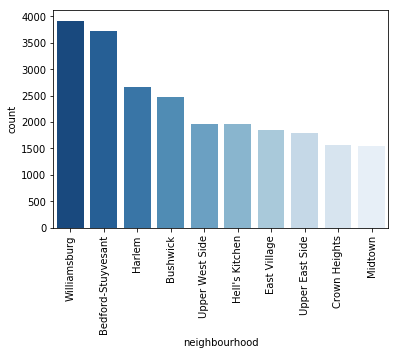

In [68]:
sns.barplot(x='neighbourhood', y='count', data=neighbourhood_counts.head(10), palette='Blues_r')
plt.xticks(rotation=90)

### Which borough has the most expensive listings?

In [81]:
borough_prices = data.groupby('neighbourhood_group')['price'].mean()
borough_prices = borough_prices.reset_index()
borough_prices = borough_prices.sort_values(by='price', ascending=False)
borough_prices

,neighbourhood_group,price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


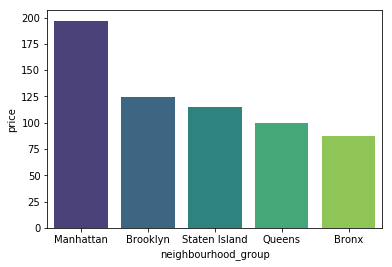

In [83]:
sns.barplot(x='neighbourhood_group', y='price', data=borough_prices, palette='viridis')

### Which room types are offered in each borough?

In [90]:
data.groupby(['neighbourhood_group', 'room_type'])['id'].nunique()

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: id, dtype: int64

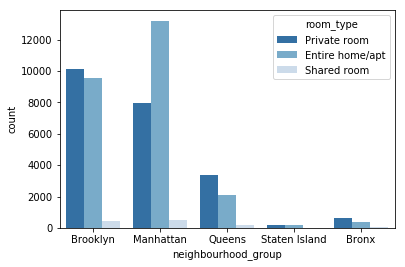

In [114]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=data, palette='Blues_r')

### What is the mean price for a listing by room type and borough?

We can group our dataframe by more than one categorical column. Here, we'll group by `room_type` and `neighbourhood_group`. Remember, the order of the groupby matters! Whatever you list first will be the first grouping. We want to calculate the mean price for a listing, but let's also look at count. To look at more than one statistic, we can use `agg` and pass in the statistics that we're looking for. In this case, we'll pass in "mean" and "count".

In [176]:
data.groupby(['room_type', 'neighbourhood_group'])['price'].agg(['mean', 'count'])

mean  count
room_type       neighbourhood_group                   
Entire home/apt Bronx                127.506596    379
                Brooklyn             178.327545   9559
                Manhattan            249.239109  13199
                Queens               147.050573   2096
                Staten Island        173.846591    176
Private room    Bronx                 66.788344    652
                Brooklyn              76.500099  10132
                Manhattan            116.776622   7982
                Queens                71.762456   3372
                Staten Island         62.292553    188
Shared room     Bronx                 59.800000     60
                Brooklyn              50.527845    413
                Manhattan             88.977083    480
                Queens                69.020202    198
                Staten Island         57.444444      9

Listings of entire homes/apartments are the most expensive, followed by private rooms and shared rooms. As expected, Manhattan is the most expensive borough across all room types. Interestingly, Brooklyn is second most expensive for entire homes and private rooms, but it's actually the least expensive for shared rooms. Queens takes second place for most expensive shared rooms.  

Let's visualize our findings with a barplot. In Seaborn, we can do a "groupby" using the `hue` parameter. See the example below.

Text(0.5, 1.0, 'Airbnb Prices by Room Type and Borough')

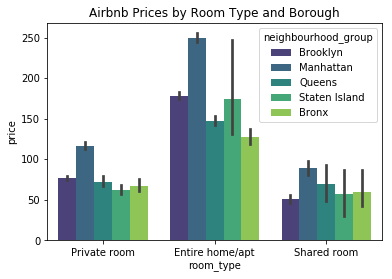

In [112]:
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=data, palette='viridis')
plt.title("Airbnb Prices by Room Type and Borough")

### What's the mean and median number of minimum nights for a listing?

We can use Pandas' [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to get descriptive statistics from our `minimum_nights` column including `mean`, standard deviation (`std`), median (`50%`), and the `min` and `max` values. 

In [127]:
data['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

The mean number of minimum nights for a listing is 7, while the median is 3. The highest possible number of minimum nights is 1250! Let's take a look at this listing.

In [137]:
data[data['minimum_nights']==1250]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


It's hard to say whether the minimum nights is accurate. The listing has 2 reviews, and the last review was more than 5 years ago in 2014. This brings up another question. How recent is our dataset? When were the last reviews for our listings?

### When were the last reviews for our listings?

The column `last_review` represents the date of a listing's last review. We can extract the year, month, and day from this column to get a better idea of when these reviews were made. In order to do this, we'll need to convert our column to "datetime" - a special datatype in Pandas. We can easily make this conversion using `pd.to_datetime()`. 

In [152]:
data['last_review'] = pd.to_datetime(data['last_review'])

Now that our column is in datetime format, we can extract year, month, or day using `dt.year`, `dt.month`, `dt.day`. In this example, we'll be focusing specifically on year. Let's create a new column called `last_review_year` which represents the year in which the last review was made.  


In [170]:
data['last_review_year'] = data['last_review'].dt.year

Text(0.5, 0, 'year of last review')

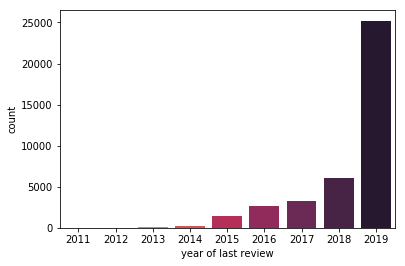

In [174]:
sns.countplot(data['last_review_year'].dropna().astype(int), palette='rocket_r')
plt.xlabel("year of last review")

The plot above shows that most of our listings' last reviews were made in 2019. So if a listing had its most recent review in 2014, we can assume that it's been inactive for the past 5 years. 